In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
input_file = '~/Repositories/covid-19-data/public/data/owid-covid-data.csv'
n = 11
group_one = ['USA', 'IND', 'GBR']
fig_size = (12, 4)

In [3]:
inp = pd.read_csv(input_file)
inp['daily_tests'] = inp['new_tests'].rolling(7).mean()
inp['daily_cases'] = inp['new_cases'].rolling(7).mean()
inp['daily_deaths'] = inp['new_deaths'].rolling(7).mean()
inp['daily_hosp'] = inp['hosp_patients'].rolling(7).mean()
inp['daily_vacc'] = inp['new_vaccinations'].rolling(7).mean()
inp['daily_deaths_change_1w'] = inp['daily_deaths'].pct_change(periods=6)*100
inp['daily_cases_change_1w'] = inp['daily_cases'].pct_change(periods=6)*100
inp['daily_hosp_change_1w'] = inp['daily_hosp'].pct_change(periods=6)*100
inp['daily_vacc_change_1w'] = inp['daily_vacc'].rolling(7).mean()

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['daily_deaths'].rolling(7).sum()/inp['daily_cases'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['daily_cases'].rolling(7).sum()/inp['daily_tests'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])
# inp.fillna(method='pad', inplace=True)

print(inp.columns)
inp[inp['iso_code'].isin(['OWID_WRL']+group_one)].groupby('iso_code').tail(2)[[
    'iso_code', 'date', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_vaccinations_per_hundred',
    'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc',
    'daily_deaths_change_1w', 'daily_cases_change_1w', 'daily_hosp_change_1w', 'daily_vacc_change_1w',
    'cfr', 'cfr_current', 'ptr', 'ptr_current']]

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

,iso_code,date,total_cases,total_deaths,total_vaccinations,total_vaccinations_per_hundred,daily_cases,daily_deaths,daily_hosp,daily_vacc,daily_deaths_change_1w,daily_cases_change_1w,daily_hosp_change_1w,daily_vacc_change_1w,cfr,cfr_current,ptr,ptr_current
24901,IND,2021-01-17,10571773.0,152419.0,224301.0,0.02,15025.428571,179.857143,NaN,NaN,-14.759648,-14.024605,0.000000,NaN,1.44,1.19,5.71,2.01
24902,IND,2021-01-18,10581823.0,152556.0,NaN,NaN,14663.428571,175.571429,NaN,NaN,-13.144876,-14.616312,0.000000,NaN,1.44,1.19,5.70,2.00
57581,GBR,2021-01-17,3405740.0,89429.0,4514802.0,6.65,46338.857143,1123.142857,NaN,262404.428571,20.048862,-20.109551,2.637909,NaN,2.63,2.01,NaN,NaN
57582,GBR,2021-01-18,3443350.0,90031.0,NaN,NaN,45101.000000,1133.571429,NaN,NaN,14.767139,-19.170110,0.000000,NaN,2.63,2.14,NaN,NaN
57944,USA,2021-01-17,23936773.0,397600.0,NaN,NaN,218100.857143,3323.285714,NaN,NaN,1.878777,-12.777949,-0.585667,NaN,1.67,1.41,NaN,NaN
57945,USA,2021-01-18,24074658.0,398981.0,NaN,NaN,207326.714286,3234.000000,NaN,NaN,-3.786816,-16.767776,-0.599855,NaN,1.66,1.44,NaN,NaN
59991,OWID_WRL,2021-01-17,95045634.0,2030831.0,40401540.0,0.52,680363.714286,13718.000000,NaN,NaN,4.752970,-7.933637,0.000000,NaN,2.14,1.90,NaN,NaN
59992,OWID_WRL,2021-01-18,95555533.0,2040085.0,NaN,NaN,664938.000000,13578.857143,NaN,NaN,1.580584,-9.445105,0.000000,NaN,2.14,1.93,NaN,NaN


In [4]:
top_n = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(n)['iso_code'].tolist()
top_fifty = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(50)['iso_code'].tolist()

In [5]:
df = inp[inp['iso_code'].isin(top_n)].groupby('iso_code').tail(1)[[
    'iso_code', 'population', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_vaccinations_per_hundred',
    'cfr', 'daily_cases_change_1w', 'daily_deaths_change_1w']]

df['cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)

df.sort_values('cases_%_world', ascending=False).set_index('iso_code')

,population,total_cases,total_deaths,total_vaccinations,total_vaccinations_per_hundred,cfr,daily_cases_change_1w,daily_deaths_change_1w,cases_%_world,deaths_%_world,cases_1M_pop,deaths_1M_pop
iso_code,,,,,,,,,,,,
OWID_WRL,7.794799e+09,95555533.0,2040085.0,NaN,NaN,2.14,-9.445105,1.580584,100.000000,100.000000,12258,261
USA,3.310026e+08,24074658.0,398981.0,NaN,NaN,1.66,-16.767776,-3.786816,25.194415,19.557077,72732,1205
IND,1.380004e+09,10581823.0,152556.0,NaN,NaN,1.44,-14.616312,-13.144876,11.074003,7.477924,7667,110
BRA,2.125594e+08,8511770.0,210299.0,NaN,NaN,2.48,-1.318409,-3.434895,8.907668,10.308345,40044,989
RUS,1.459345e+08,3552888.0,65059.0,NaN,NaN,1.82,0.914168,14.615865,3.718139,3.189034,24345,445
GBR,6.788600e+07,3443350.0,90031.0,NaN,NaN,2.63,-19.170110,14.767139,3.603507,4.413100,50722,1326
FRA,6.527351e+07,2972889.0,70826.0,479873.0,0.74,2.39,1.370220,4.242665,3.111164,3.471718,45545,1085
TUR,8.433907e+07,2392963.0,24161.0,832412.0,0.99,1.00,-25.854510,-7.305577,2.504264,1.184313,28373,286
ITA,6.046183e+07,2390102.0,82554.0,NaN,NaN,3.46,-16.904245,-3.982808,2.501270,4.046596,39530,1365


<AxesSubplot:title={'center':'Vaccinations'}, xlabel='iso_code'>

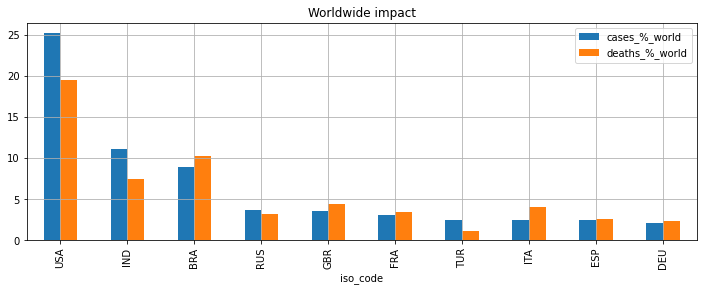

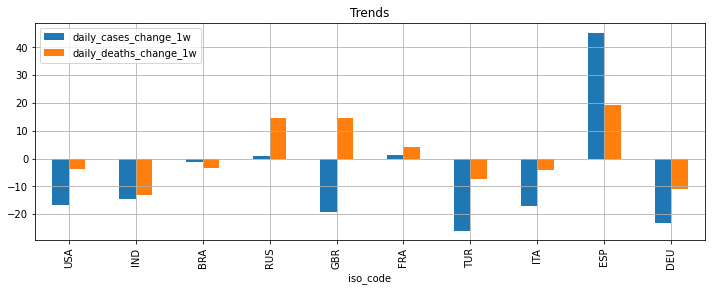

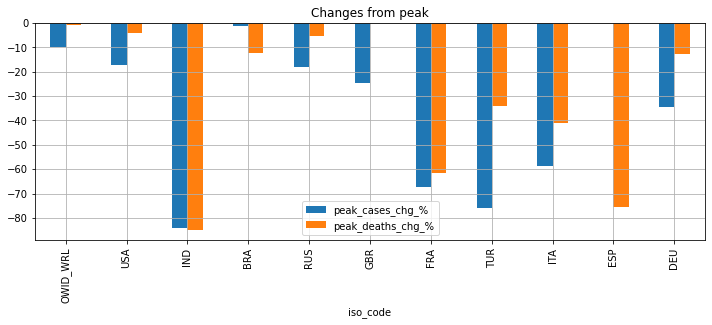

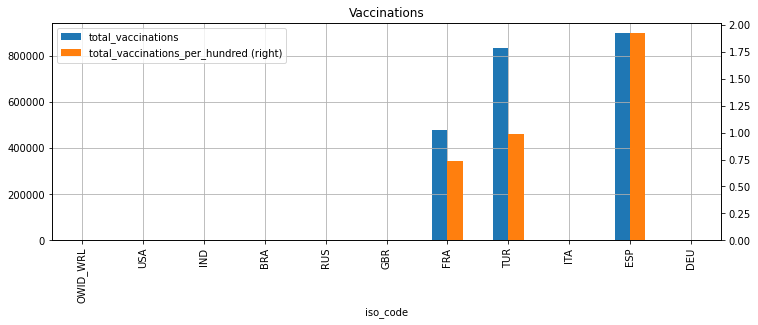

In [6]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['cases_%_world', 'deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='Worldwide impact')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_change_1w', 'daily_deaths_change_1w'],
    kind='bar', figsize=fig_size, grid=True, title='Trends')

df_max = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['daily_cases', 'daily_deaths']].max()
df_last = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['iso_code', 'daily_cases', 'daily_deaths']].tail(1).set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1).set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'daily_cases': 'peak_cases_chg_%','daily_deaths': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Changes from peak')

df.sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_vaccinations', 'total_vaccinations_per_hundred'], secondary_y=['total_vaccinations_per_hundred'],
    kind='bar', figsize=fig_size, grid=True, title='Vaccinations')

<AxesSubplot:title={'center':'Top total vaccs'}, xlabel='iso_code'>

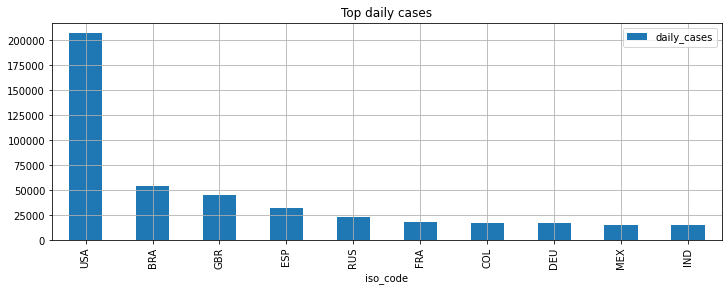

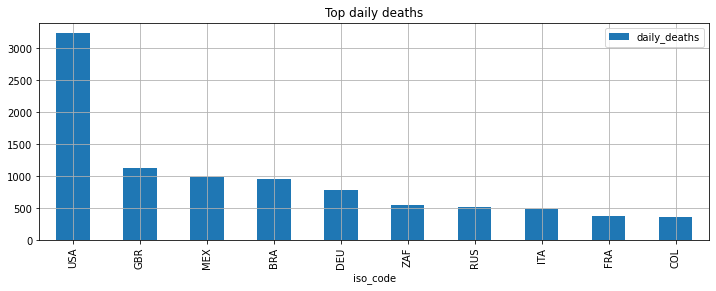

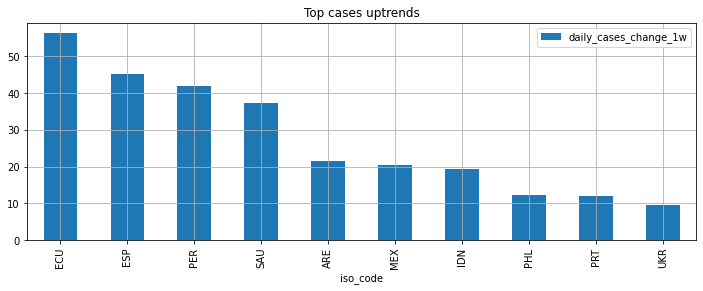

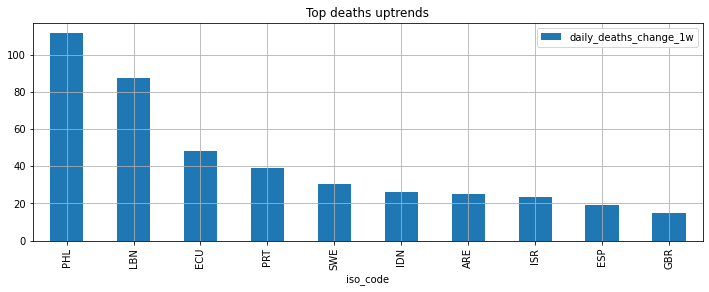

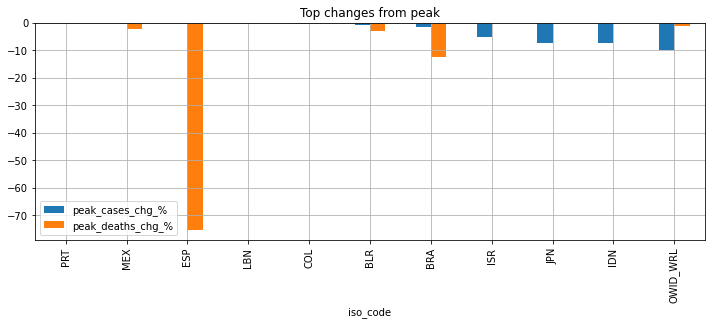

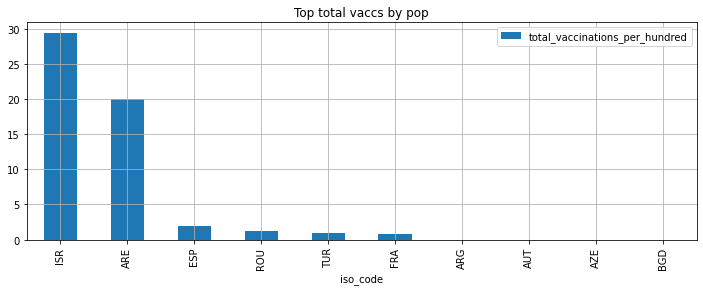

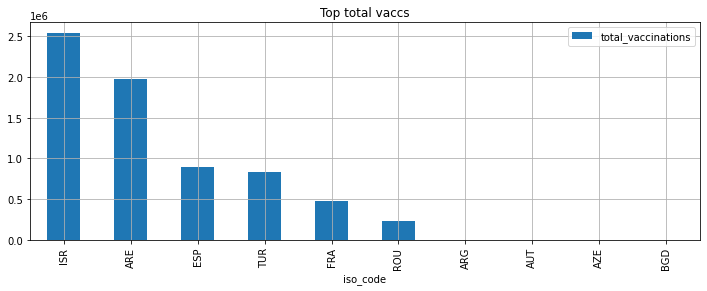

In [7]:
inp[inp['iso_code'] != 'OWID_WRL'].groupby('iso_code').tail(1)[['iso_code', 'daily_cases']].set_index('iso_code').sort_values(
    by='daily_cases', ascending=False).head(10).plot(y=['daily_cases'], kind='bar',
                                                     figsize=fig_size, grid=True, title='Top daily cases')

inp[inp['iso_code'] != 'OWID_WRL'].groupby('iso_code').tail(1)[['iso_code', 'daily_deaths']].set_index('iso_code').sort_values(
    by='daily_deaths', ascending=False).head(10).plot(y=['daily_deaths'], kind='bar',
                                                      figsize=fig_size, grid=True, title='Top daily deaths')

inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code', 'daily_cases_change_1w']].set_index('iso_code').sort_values(
    by='daily_cases_change_1w', ascending=False).head(10).plot(y=['daily_cases_change_1w'], kind='bar',
                                                               figsize=fig_size, grid=True, title='Top cases uptrends')

inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code', 'daily_deaths_change_1w']].set_index('iso_code').sort_values(
    by='daily_deaths_change_1w', ascending=False).head(10).plot(y=['daily_deaths_change_1w'], kind='bar',
                                                               figsize=fig_size, grid=True, title='Top deaths uptrends')

df_pct_chg_max.sort_values(by=['peak_cases_chg_%', 'peak_deaths_chg_%', 'total_cases'], ascending=[False, False, False]).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Top changes from peak')

inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code', 'total_vaccinations_per_hundred']].set_index('iso_code').sort_values(
    by='total_vaccinations_per_hundred', ascending=False).head(10).plot(y=['total_vaccinations_per_hundred'], kind='bar',
                                                                        figsize=fig_size, grid=True, title='Top total vaccs by pop')

inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code', 'total_vaccinations']].set_index('iso_code').sort_values(
    by='total_vaccinations', ascending=False).head(10).plot(y=['total_vaccinations'], kind='bar',
                                                            figsize=fig_size, grid=True, title='Top total vaccs')

In [8]:
def plot_weekly_avg(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc']].plot(
        x='date', y=['daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc'],
        secondary_y=['daily_deaths'],
        style = ['-', '-', '--', '--'], figsize=fig_size, grid=True, title=country)
    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_totals(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'total_cases', 'total_deaths', 'total_vaccinations']].plot(
        x='date', y=['total_cases', 'total_deaths', 'total_vaccinations'], secondary_y=['total_deaths'],
        style = ['-', '-', '--'], figsize=fig_size, grid=True, title=country)

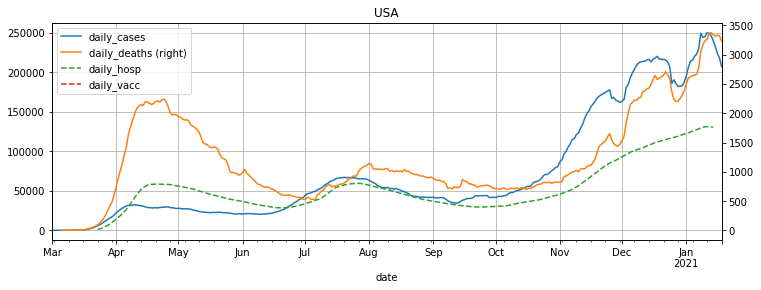

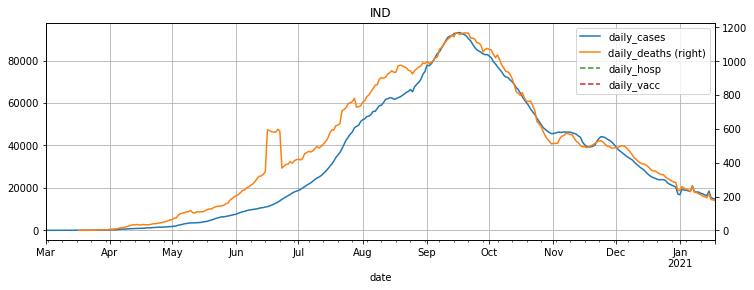

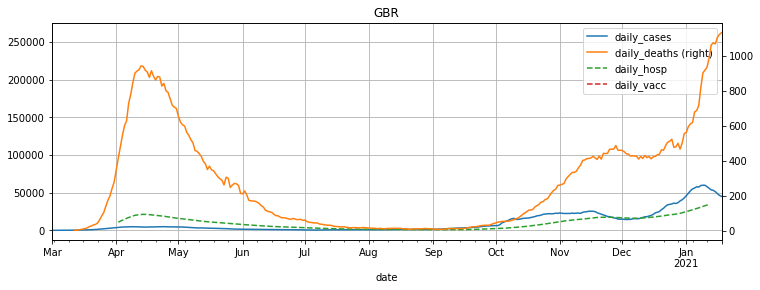

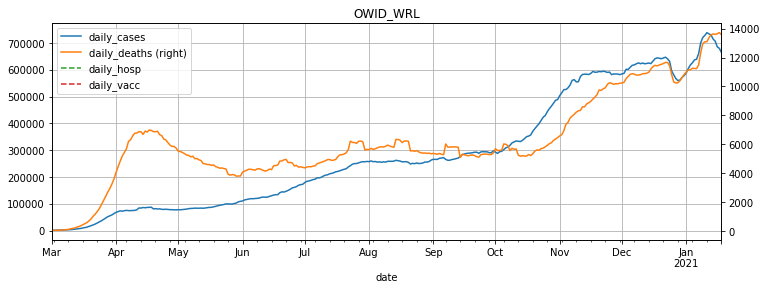

In [9]:
for country in group_one+['OWID_WRL']:
    plot_weekly_avg(inp, iso_code=country)

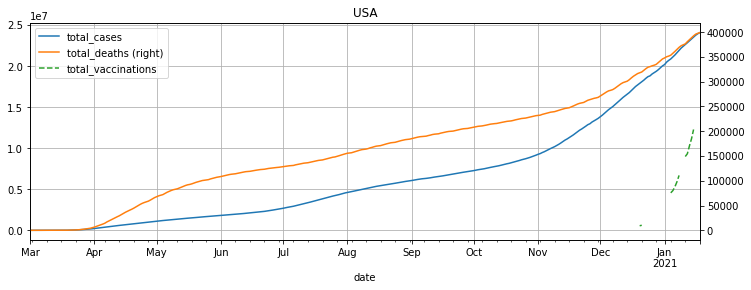

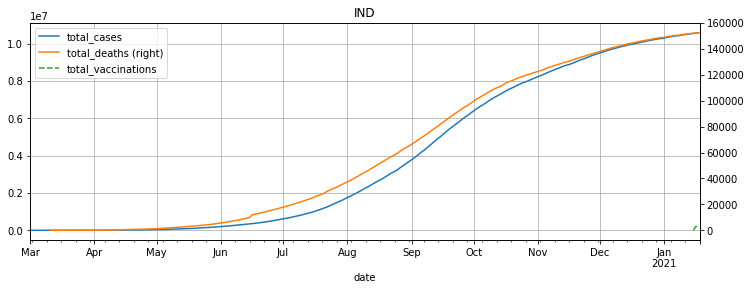

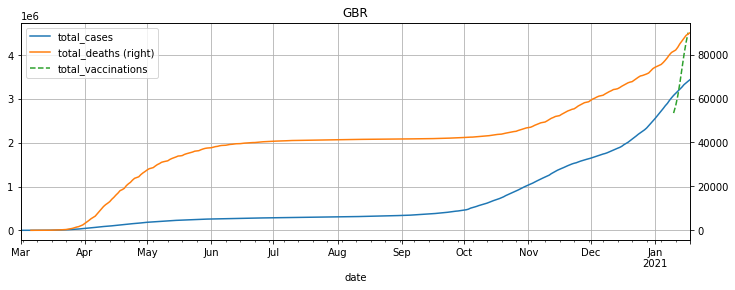

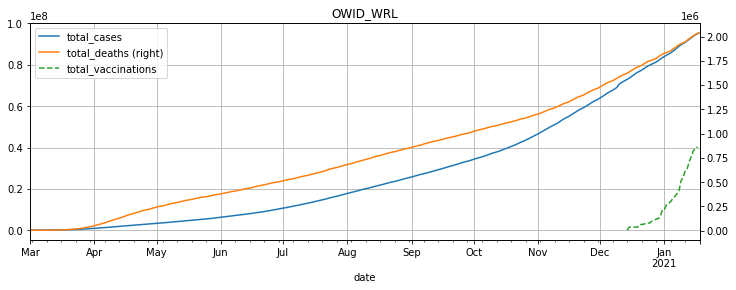

In [10]:
for country in group_one+['OWID_WRL']:
    plot_totals(inp, iso_code=country)

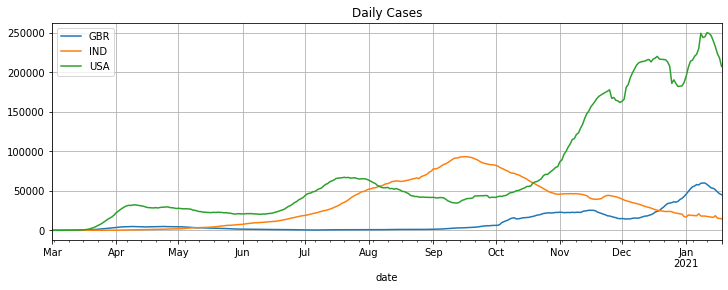

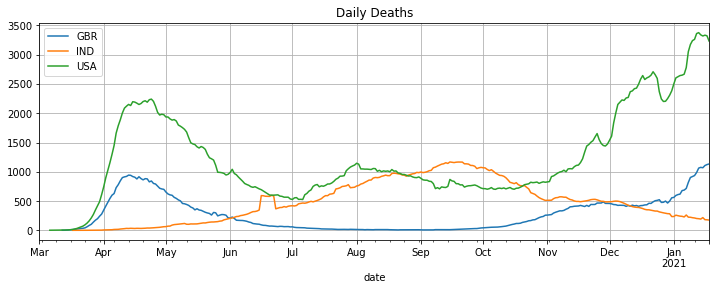

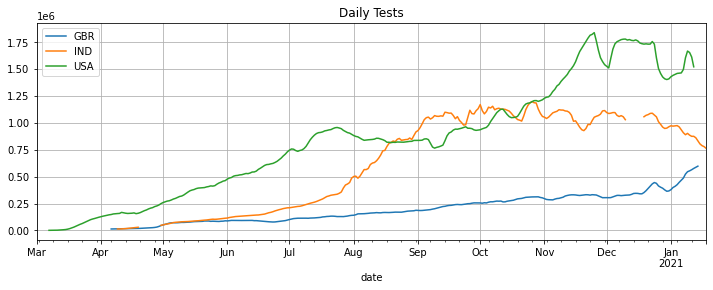

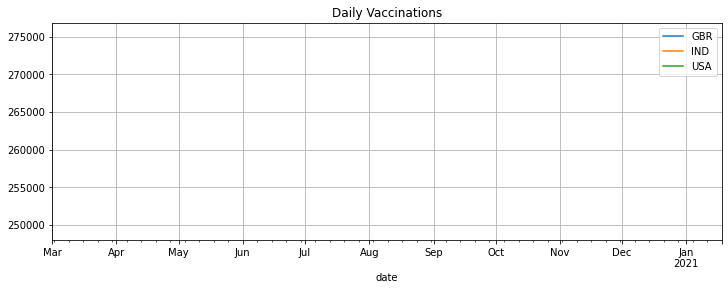

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_cases'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Cases')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_deaths'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Deaths')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_tests'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Tests')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_vacc'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Vaccinations')
axes.legend(list(reversed(group_one)))

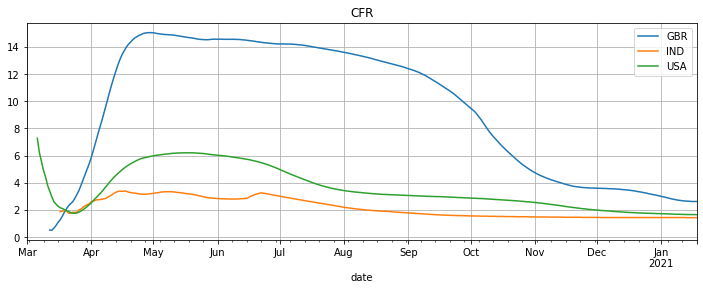

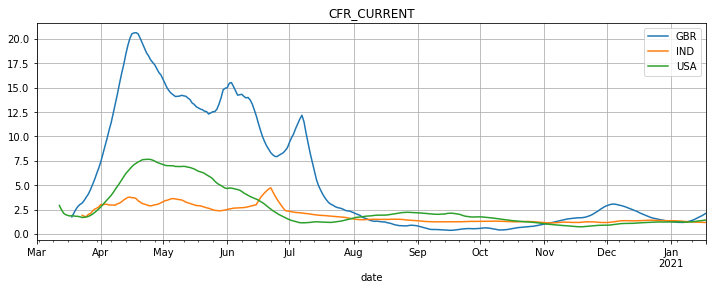

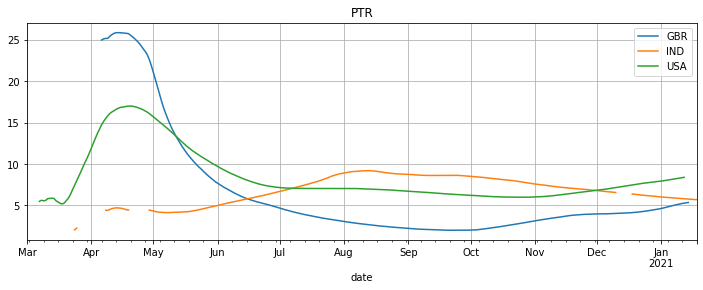

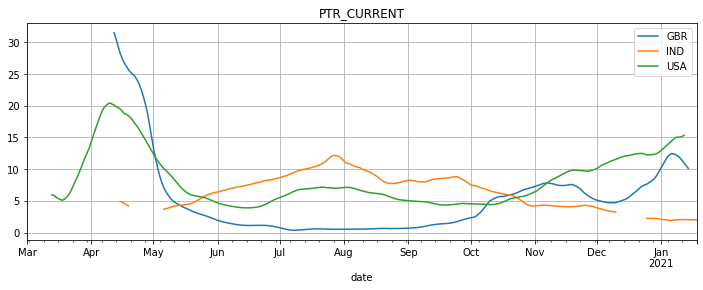

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(list(reversed(group_one)))